### Bibliotecas

In [262]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
from scipy.stats import norm
import pywt
from aeon.classification.distance_based import ElasticEnsemble, ShapeDTW, KNeighborsTimeSeriesClassifier
from sklearn.linear_model import RidgeClassifierCV
from aeon.datasets import load_classification
from aeon.datasets.tsc_data_lists import univariate_equal_length
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm
import timeit
from datetime import timedelta
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")

In [335]:
dataset_list = ['Adiac', 'Beef', 'Car', 'CBF', 'Coffee', 'DiatomSizeReduction', 'ECG200', 'ECGFiveDays', 'FaceFour',
'GunPoint', 'Lightning2', 'Lightning7', 'MoteStrain', 'OliveOil', 'SonyAIBORobotSurface1','SonyAIBORobotSurface2', 'SyntheticControl', 'Trace', 'TwoPatterns']
#MedicalImages
# Para cada conjunto de dados na lista
total_time = 0
for dataset_name in dataset_list:
    # Carregue os dados de treinamento e teste
    X_train, y_train = load_classification(dataset_name, extract_path="./Temp/", split="TRAIN")
    X_test, y_test = load_classification(dataset_name, extract_path="./Temp/", split="test")
    
    # Achatando os dados para 2D, pois alguns algoritmos esperam 2D
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)
    
    dataset_accuracies = []
    # Para cada algoritmo
    for algo in algos:
        # Treinar o modelo e fazer previsões
        start = timeit.default_timer()
        trained_base_models, meta_classifier = train_with_meta_classifier(X_train_flat, y_train, base_option='svm', meta_option='rd')
        predictions_test_meta = predict_with_meta_classifier(X_test_flat, trained_base_models, meta_classifier)
        stop = timeit.default_timer()
        total_time += stop - start
        real_time = str(timedelta(seconds=total_time))
        
        # Calcular a acurácia e armazená-la
        test_accuracy_meta = np.mean(predictions_test_meta == y_test)
        dataset_accuracies.append(test_accuracy_meta)
        
        
        print(f"Acurácia do modelo {algo} para {dataset_name}: {test_accuracy_meta}")
        print('Time runtime (seconds): ', real_time)
        
np.savetxt("Results_1NN_.csv", dataset_accuracies, delimiter=",")

Testing Instances: 100%|##########| 391/391 [00:01<00:00, 366.51it/s]


Acurácia do modelo 1nn para Adiac: 0.8337595907928389
Time runtime (seconds):  0:05:25.227257


Testing Instances: 100%|##########| 391/391 [00:01<00:00, 348.53it/s]


Acurácia do modelo 3nn para Adiac: 0.8286445012787724
Time runtime (seconds):  0:10:50.148244


Testing Instances: 100%|##########| 391/391 [00:01<00:00, 359.91it/s]


Acurácia do modelo svm para Adiac: 0.8286445012787724
Time runtime (seconds):  0:16:15.640809


Testing Instances: 100%|##########| 391/391 [00:01<00:00, 356.50it/s]


Acurácia do modelo nb para Adiac: 0.8363171355498721
Time runtime (seconds):  0:21:39.861950


Testing Instances: 100%|##########| 391/391 [00:01<00:00, 349.43it/s]


Acurácia do modelo gbc para Adiac: 0.8312020460358056
Time runtime (seconds):  0:27:03.875048


Testing Instances: 100%|##########| 391/391 [00:01<00:00, 347.31it/s]


Acurácia do modelo ee para Adiac: 0.8337595907928389
Time runtime (seconds):  0:32:27.731364


Testing Instances: 100%|##########| 391/391 [00:01<00:00, 339.23it/s]


Acurácia do modelo shape para Adiac: 0.8312020460358056
Time runtime (seconds):  0:37:52.109686


Testing Instances: 100%|##########| 391/391 [00:01<00:00, 348.44it/s]


Acurácia do modelo rf para Adiac: 0.8363171355498721
Time runtime (seconds):  0:43:15.945759


Testing Instances: 100%|##########| 391/391 [00:01<00:00, 353.14it/s]


Acurácia do modelo rd para Adiac: 0.8286445012787724
Time runtime (seconds):  0:48:39.712935


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 238.84it/s]


Acurácia do modelo 1nn para Beef: 0.8333333333333334
Time runtime (seconds):  0:48:40.471757


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 252.95it/s]


Acurácia do modelo 3nn para Beef: 0.9
Time runtime (seconds):  0:48:41.207341


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 246.76it/s]


Acurácia do modelo svm para Beef: 0.8666666666666667
Time runtime (seconds):  0:48:41.945050


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 238.68it/s]


Acurácia do modelo nb para Beef: 0.8666666666666667
Time runtime (seconds):  0:48:42.725370


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 251.49it/s]


Acurácia do modelo gbc para Beef: 0.9
Time runtime (seconds):  0:48:43.459350


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 242.85it/s]


Acurácia do modelo ee para Beef: 0.8333333333333334
Time runtime (seconds):  0:48:44.197005


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 234.84it/s]


Acurácia do modelo shape para Beef: 0.9
Time runtime (seconds):  0:48:44.943541


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 253.11it/s]


Acurácia do modelo rf para Beef: 0.8333333333333334
Time runtime (seconds):  0:48:45.716508


Testing Instances: 100%|##########| 30/30 [00:00<00:00, 255.01it/s]


Acurácia do modelo rd para Beef: 0.8333333333333334
Time runtime (seconds):  0:48:46.452685


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 198.02it/s]


Acurácia do modelo 1nn para Car: 0.8166666666666667
Time runtime (seconds):  0:48:49.909160


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 207.62it/s]


Acurácia do modelo 3nn para Car: 0.8666666666666667
Time runtime (seconds):  0:48:53.365826


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 217.51it/s]


Acurácia do modelo svm para Car: 0.8333333333333334
Time runtime (seconds):  0:48:56.793112


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 218.79it/s]


Acurácia do modelo nb para Car: 0.8833333333333333
Time runtime (seconds):  0:49:00.223044


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 210.05it/s]


Acurácia do modelo gbc para Car: 0.8666666666666667
Time runtime (seconds):  0:49:03.671182


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 211.39it/s]


Acurácia do modelo ee para Car: 0.85
Time runtime (seconds):  0:49:07.093170


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 209.95it/s]


Acurácia do modelo shape para Car: 0.8666666666666667
Time runtime (seconds):  0:49:10.507859


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 190.41it/s]


Acurácia do modelo rf para Car: 0.8166666666666667
Time runtime (seconds):  0:49:13.950869


Testing Instances: 100%|##########| 60/60 [00:00<00:00, 212.11it/s]


Acurácia do modelo rd para Car: 0.85
Time runtime (seconds):  0:49:17.370962


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 529.87it/s]


Acurácia do modelo 1nn para CBF: 0.8877777777777778
Time runtime (seconds):  0:49:19.416175


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 533.54it/s]


Acurácia do modelo 3nn para CBF: 0.8766666666666667
Time runtime (seconds):  0:49:21.439337


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 536.15it/s]


Acurácia do modelo svm para CBF: 0.8733333333333333
Time runtime (seconds):  0:49:23.459472


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 538.07it/s]


Acurácia do modelo nb para CBF: 0.8777777777777778
Time runtime (seconds):  0:49:25.508438


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 534.87it/s]


Acurácia do modelo gbc para CBF: 0.8711111111111111
Time runtime (seconds):  0:49:27.522709


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 534.18it/s]


Acurácia do modelo ee para CBF: 0.8677777777777778
Time runtime (seconds):  0:49:29.578286


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 527.33it/s]


Acurácia do modelo shape para CBF: 0.8677777777777778
Time runtime (seconds):  0:49:31.625444


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 521.62it/s]


Acurácia do modelo rf para CBF: 0.8722222222222222
Time runtime (seconds):  0:49:33.690801


Testing Instances: 100%|##########| 900/900 [00:01<00:00, 536.84it/s]


Acurácia do modelo rd para CBF: 0.8855555555555555
Time runtime (seconds):  0:49:35.704890


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 315.15it/s]


Acurácia do modelo 1nn para Coffee: 1.0
Time runtime (seconds):  0:49:36.046264


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 356.32it/s]


Acurácia do modelo 3nn para Coffee: 1.0
Time runtime (seconds):  0:49:36.427654


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 360.91it/s]


Acurácia do modelo svm para Coffee: 1.0
Time runtime (seconds):  0:49:36.761985


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 355.14it/s]


Acurácia do modelo nb para Coffee: 1.0
Time runtime (seconds):  0:49:37.112388


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 356.03it/s]


Acurácia do modelo gbc para Coffee: 1.0
Time runtime (seconds):  0:49:37.445488


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 357.50it/s]


Acurácia do modelo ee para Coffee: 1.0
Time runtime (seconds):  0:49:37.779213


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 320.81it/s]


Acurácia do modelo shape para Coffee: 1.0
Time runtime (seconds):  0:49:38.156217


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 335.94it/s]


Acurácia do modelo rf para Coffee: 1.0
Time runtime (seconds):  0:49:38.505391


Testing Instances: 100%|##########| 28/28 [00:00<00:00, 360.07it/s]


Acurácia do modelo rd para Coffee: 1.0
Time runtime (seconds):  0:49:38.841956


Testing Instances: 100%|##########| 306/306 [00:01<00:00, 302.07it/s]


Acurácia do modelo 1nn para DiatomSizeReduction: 0.9444444444444444
Time runtime (seconds):  0:49:40.063203


Testing Instances: 100%|##########| 306/306 [00:00<00:00, 318.52it/s]


Acurácia do modelo 3nn para DiatomSizeReduction: 0.9477124183006536
Time runtime (seconds):  0:49:41.172934


Testing Instances: 100%|##########| 306/306 [00:00<00:00, 316.99it/s]


Acurácia do modelo svm para DiatomSizeReduction: 0.9379084967320261
Time runtime (seconds):  0:49:42.292206


Testing Instances: 100%|##########| 306/306 [00:00<00:00, 312.25it/s]


Acurácia do modelo nb para DiatomSizeReduction: 0.954248366013072
Time runtime (seconds):  0:49:43.423842


Testing Instances: 100%|##########| 306/306 [00:00<00:00, 313.43it/s]


Acurácia do modelo gbc para DiatomSizeReduction: 0.9281045751633987
Time runtime (seconds):  0:49:44.591871


Testing Instances: 100%|##########| 306/306 [00:00<00:00, 315.12it/s]


Acurácia do modelo ee para DiatomSizeReduction: 0.9248366013071896
Time runtime (seconds):  0:49:45.709428


Testing Instances: 100%|##########| 306/306 [00:00<00:00, 311.11it/s]


Acurácia do modelo shape para DiatomSizeReduction: 0.9444444444444444
Time runtime (seconds):  0:49:46.842588


Testing Instances: 100%|##########| 306/306 [00:01<00:00, 301.66it/s]


Acurácia do modelo rf para DiatomSizeReduction: 0.9281045751633987
Time runtime (seconds):  0:49:48.005170


Testing Instances: 100%|##########| 306/306 [00:00<00:00, 319.40it/s]


Acurácia do modelo rd para DiatomSizeReduction: 0.934640522875817
Time runtime (seconds):  0:49:49.111855


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 590.57it/s]


Acurácia do modelo 1nn para ECG200: 0.79
Time runtime (seconds):  0:49:52.799384


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 597.09it/s]


Acurácia do modelo 3nn para ECG200: 0.82
Time runtime (seconds):  0:49:56.436355


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 604.83it/s]


Acurácia do modelo svm para ECG200: 0.86
Time runtime (seconds):  0:50:00.060813


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 573.53it/s]


Acurácia do modelo nb para ECG200: 0.86
Time runtime (seconds):  0:50:03.689461


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 596.44it/s]


Acurácia do modelo gbc para ECG200: 0.82
Time runtime (seconds):  0:50:07.359732


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 590.61it/s]


Acurácia do modelo ee para ECG200: 0.86
Time runtime (seconds):  0:50:10.980198


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 583.12it/s]


Acurácia do modelo shape para ECG200: 0.87
Time runtime (seconds):  0:50:14.596175


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 594.72it/s]


Acurácia do modelo rf para ECG200: 0.83
Time runtime (seconds):  0:50:18.250179


Testing Instances: 100%|##########| 100/100 [00:00<00:00, 590.47it/s]


Acurácia do modelo rd para ECG200: 0.85
Time runtime (seconds):  0:50:21.900362


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 517.21it/s]


Acurácia do modelo 1nn para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:23.767768


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 519.99it/s]


Acurácia do modelo 3nn para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:25.624015


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 507.96it/s]


Acurácia do modelo svm para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:27.519238


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 520.67it/s]


Acurácia do modelo nb para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:29.376553


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 521.71it/s]


Acurácia do modelo gbc para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:31.223287


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 520.37it/s]


Acurácia do modelo ee para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:33.120682


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 524.86it/s]


Acurácia do modelo shape para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:34.965683


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 523.64it/s]


Acurácia do modelo rf para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:36.858775


Testing Instances: 100%|##########| 861/861 [00:01<00:00, 524.44it/s]


Acurácia do modelo rd para ECGFiveDays: 1.0
Time runtime (seconds):  0:50:38.702187


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 312.68it/s]


Acurácia do modelo 1nn para FaceFour: 0.8636363636363636
Time runtime (seconds):  0:50:39.323219


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 309.82it/s]


Acurácia do modelo 3nn para FaceFour: 0.8295454545454546
Time runtime (seconds):  0:50:39.943310


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 298.19it/s]


Acurácia do modelo svm para FaceFour: 0.8181818181818182
Time runtime (seconds):  0:50:40.572250


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 277.67it/s]


Acurácia do modelo nb para FaceFour: 0.8409090909090909
Time runtime (seconds):  0:50:41.231081


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 305.74it/s]


Acurácia do modelo gbc para FaceFour: 0.8181818181818182
Time runtime (seconds):  0:50:41.850058


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 310.07it/s]


Acurácia do modelo ee para FaceFour: 0.8181818181818182
Time runtime (seconds):  0:50:42.465599


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 311.37it/s]


Acurácia do modelo shape para FaceFour: 0.8636363636363636
Time runtime (seconds):  0:50:43.084392


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 317.68it/s]


Acurácia do modelo rf para FaceFour: 0.8068181818181818
Time runtime (seconds):  0:50:43.699027


Testing Instances: 100%|##########| 88/88 [00:00<00:00, 313.17it/s]


Acurácia do modelo rd para FaceFour: 0.8295454545454546
Time runtime (seconds):  0:50:44.374941


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 496.65it/s]


Acurácia do modelo 1nn para GunPoint: 0.9066666666666666
Time runtime (seconds):  0:50:45.407619


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 510.75it/s]


Acurácia do modelo 3nn para GunPoint: 0.9
Time runtime (seconds):  0:50:46.431598


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 505.85it/s]


Acurácia do modelo svm para GunPoint: 0.9066666666666666
Time runtime (seconds):  0:50:47.465902


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 506.45it/s]


Acurácia do modelo nb para GunPoint: 0.9133333333333333
Time runtime (seconds):  0:50:48.529712


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 499.97it/s]


Acurácia do modelo gbc para GunPoint: 0.8933333333333333
Time runtime (seconds):  0:50:49.566752


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 505.23it/s]


Acurácia do modelo ee para GunPoint: 0.9
Time runtime (seconds):  0:50:50.594228


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 505.58it/s]


Acurácia do modelo shape para GunPoint: 0.9
Time runtime (seconds):  0:50:51.616614


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 498.31it/s]


Acurácia do modelo rf para GunPoint: 0.9
Time runtime (seconds):  0:50:52.697899


Testing Instances: 100%|##########| 150/150 [00:00<00:00, 507.20it/s]


Acurácia do modelo rd para GunPoint: 0.9133333333333333
Time runtime (seconds):  0:50:53.732711


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 199.45it/s]


Acurácia do modelo 1nn para Lightning2: 0.6885245901639344
Time runtime (seconds):  0:50:57.243404


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 200.45it/s]


Acurácia do modelo 3nn para Lightning2: 0.7049180327868853
Time runtime (seconds):  0:51:00.728091


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 198.40it/s]


Acurácia do modelo svm para Lightning2: 0.7049180327868853
Time runtime (seconds):  0:51:04.218416


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 203.33it/s]


Acurácia do modelo nb para Lightning2: 0.7213114754098361
Time runtime (seconds):  0:51:07.758268


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 195.80it/s]


Acurácia do modelo gbc para Lightning2: 0.7049180327868853
Time runtime (seconds):  0:51:11.263293


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 199.12it/s]


Acurácia do modelo ee para Lightning2: 0.6721311475409836
Time runtime (seconds):  0:51:14.746020


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 201.18it/s]


Acurácia do modelo shape para Lightning2: 0.7049180327868853
Time runtime (seconds):  0:51:18.266255


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 204.45it/s]


Acurácia do modelo rf para Lightning2: 0.6885245901639344
Time runtime (seconds):  0:51:21.760297


Testing Instances: 100%|##########| 61/61 [00:00<00:00, 198.57it/s]


Acurácia do modelo rd para Lightning2: 0.6885245901639344
Time runtime (seconds):  0:51:25.266480


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 319.46it/s]


Acurácia do modelo 1nn para Lightning7: 0.684931506849315
Time runtime (seconds):  0:51:29.944461


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 315.90it/s]


Acurácia do modelo 3nn para Lightning7: 0.726027397260274
Time runtime (seconds):  0:51:34.657944


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 326.07it/s]


Acurácia do modelo svm para Lightning7: 0.6712328767123288
Time runtime (seconds):  0:51:39.362521


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 309.49it/s]


Acurácia do modelo nb para Lightning7: 0.6164383561643836
Time runtime (seconds):  0:51:44.078249


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 321.44it/s]


Acurácia do modelo gbc para Lightning7: 0.6712328767123288
Time runtime (seconds):  0:51:48.819939


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 315.46it/s]


Acurácia do modelo ee para Lightning7: 0.6301369863013698
Time runtime (seconds):  0:51:53.503490


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 318.42it/s]


Acurácia do modelo shape para Lightning7: 0.6438356164383562
Time runtime (seconds):  0:51:58.207003


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 325.33it/s]


Acurácia do modelo rf para Lightning7: 0.6301369863013698
Time runtime (seconds):  0:52:02.925032


Testing Instances: 100%|##########| 73/73 [00:00<00:00, 313.45it/s]


Acurácia do modelo rd para Lightning7: 0.6712328767123288
Time runtime (seconds):  0:52:07.649389


Training Base Models:  20%|##        | 1/5 [1:48:54<7:15:36, 6534.14s/it]


KeyboardInterrupt: 

### Dados

In [338]:
try:
    train_data = pd.read_parquet('\DS\Parquet_Quali\Adiac_TRAIN.parquet')
    test_data = pd.read_parquet('\DS\Parquet_Quali\Adiac_TEST.parquet')
except FileNotFoundError:
    print("Ensure the Parquet files are in the correct path.")
    raise

In [339]:
X_train = train_data.drop('target', axis=1).values
y_train = train_data['target'].values

X_test = test_data.drop('target', axis=1).values
y_test = test_data['target'].values

### Função de transformação dos dados.

In [340]:
def sax_transform(series, w, a):
    paa = [series[i:i + w].mean() for i in range(0, len(series), w)]
    
    if np.std(paa) != 0:
        paa = (paa - np.mean(paa)) / np.std(paa)
    else:
        paa = paa - np.mean(paa)
    
    breakpoints = norm.ppf(np.linspace(0, 1, a+1)[1:-1])
    sax_symbols = np.array(range(a))
    sax_representation = sax_symbols[np.digitize(paa, breakpoints)]
    
    return sax_representation

def transform_data(X, num_features=10):
    a = 5
    w = int(X.shape[1] / num_features)  # Ajuste do tamanho da janela baseado no número de características desejado
    
    X_sax = np.array([sax_transform(row, w, a) for row in X])
    X_fft = np.abs(fft(X, axis=1))
    
    coeffs_cA, coeffs_cD = pywt.dwt(X, 'db4', axis=1)
    X_dwt = np.hstack((coeffs_cA, coeffs_cD))
    
    X_paa = np.column_stack([X[:, i:i+2].mean(axis=1) for i in range(0, X.shape[1], 2)])

    return {
        "TS": X,
        "FFT": X_fft,
        "DWT": X_dwt,
        "PAA": X_paa,
        "SAX": X_sax
    }

### Seleção do modelo extrator e modelo classificador

In [341]:
def select_model(option, random_state):
    if option == '1nn':
        return KNeighborsTimeSeriesClassifier(distance='euclidean', n_neighbors=1)
    elif option == '3nn':
        return KNeighborsTimeSeriesClassifier(distance='dtw', n_neighbors=3)
    elif option == 'svm':
        return SVC(C = 100, gamma=0.01, kernel='linear', probability=True)
    elif option == 'gbc':
        return GradientBoostingClassifier(n_estimators=100, random_state=random_state)
    elif option == 'nb':
        return GaussianNB()
    elif option == 'shape':
        return ShapeDTW(n_neighbors=3)
    elif option == 'ee':
        return ElasticEnsemble(proportion_of_param_options= 0.5,
                               proportion_train_in_param_finding= 0.5,
                               proportion_train_for_test=0.5,
                               n_jobs=-1,
                               random_state=random_state,
                               majority_vote=True)
    elif option == 'rd':
        return RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    else:
        return RandomForestClassifier(n_estimators=100,random_state=random_state)

### Treino do modelos extrator e classificador

In [342]:
"""def train_with_meta_classifier(X_train, y_train, base_option='random_forest', meta_option='1nn', random_state=42):
    trained_models = {}  # Salvar modelos treinados para cada transformação
    
    X_train_transformed = transform_data(X_train)  # Transformar todo o conjunto de treino

    # Treinar um modelo para cada transformação e salvar no dicionário
    for rep, X_trans in tqdm(X_train_transformed.items(), ascii=True, desc="Training Base Models"):
        model = select_model(base_option, random_state)
        model.fit(X_trans, y_train)
        trained_models[rep] = model
        
    # Preparar dados para o meta-classificador
    meta_features = []
    for i in range(X_train.shape[0]):
        instance_features = []
        for rep, model in trained_models.items():
            proba = model.predict_proba(X_train_transformed[rep][i].reshape(1, -1))
            instance_features.extend(proba.flatten())  # Estender a lista com todas as probabilidades
        meta_features.append(instance_features)
    
    meta_features = np.array(meta_features)
    np.savetxt("meta-features-train.csv", meta_features, delimiter=",")
    
    # Treinar o meta-classificador
    meta_classifier = select_model(meta_option, random_state)
    meta_classifier.fit(meta_features, y_train)
    
    return trained_models, meta_classifier"""

'def train_with_meta_classifier(X_train, y_train, base_option=\'random_forest\', meta_option=\'1nn\', random_state=42):\n    trained_models = {}  # Salvar modelos treinados para cada transformação\n    \n    X_train_transformed = transform_data(X_train)  # Transformar todo o conjunto de treino\n\n    # Treinar um modelo para cada transformação e salvar no dicionário\n    for rep, X_trans in tqdm(X_train_transformed.items(), ascii=True, desc="Training Base Models"):\n        model = select_model(base_option, random_state)\n        model.fit(X_trans, y_train)\n        trained_models[rep] = model\n        \n    # Preparar dados para o meta-classificador\n    meta_features = []\n    for i in range(X_train.shape[0]):\n        instance_features = []\n        for rep, model in trained_models.items():\n            proba = model.predict_proba(X_train_transformed[rep][i].reshape(1, -1))\n            instance_features.extend(proba.flatten())  # Estender a lista com todas as probabilidades\n      

In [343]:
"""from sklearn.model_selection import LeaveOneOut

def train_with_meta_classifier(X_train, y_train, base_option='random_forest', meta_option='1nn', random_state=42):
    trained_models = {}  # Salvar modelos treinados para cada transformação
    
    X_train_transformed = transform_data(X_train)  # Transformar todo o conjunto de treino
    
    loo = LeaveOneOut()
    
    # Treinar um modelo para cada transformação e salvar no dicionário
    for rep, X_trans in tqdm(X_train_transformed.items(), ascii=True, desc="Training Base Models"):
        model = select_model(base_option, random_state)
        scores = []
        for train_index, _ in loo.split(X_trans):
            model.fit(X_trans[train_index], y_train[train_index])
            score = model.score(X_trans[train_index], y_train[train_index])  # Score do modelo nos dados de treino
            scores.append(score)
        avg_score = np.mean(scores)
        trained_models[rep] = (model, avg_score)  # Salvar o modelo treinado e a média dos scores
        
    # Preparar dados para o meta-classificador
    meta_features = []
    for i in range(X_train.shape[0]):
        instance_features = []
        for rep, (model, _) in trained_models.items():
            proba = model.predict_proba(X_train_transformed[rep][i].reshape(1, -1))
            instance_features.extend(proba.flatten())  # Estender a lista com todas as probabilidades
        meta_features.append(instance_features)
    
    meta_features = np.array(meta_features)
    np.savetxt("meta-features-train.csv", meta_features, delimiter=",")
    
    # Treinar o meta-classificador
    meta_classifier = select_model(meta_option, random_state)
    meta_classifier.fit(meta_features, y_train)
    
    return trained_models, meta_classifier
"""

'from sklearn.model_selection import LeaveOneOut\n\ndef train_with_meta_classifier(X_train, y_train, base_option=\'random_forest\', meta_option=\'1nn\', random_state=42):\n    trained_models = {}  # Salvar modelos treinados para cada transformação\n    \n    X_train_transformed = transform_data(X_train)  # Transformar todo o conjunto de treino\n    \n    loo = LeaveOneOut()\n    \n    # Treinar um modelo para cada transformação e salvar no dicionário\n    for rep, X_trans in tqdm(X_train_transformed.items(), ascii=True, desc="Training Base Models"):\n        model = select_model(base_option, random_state)\n        scores = []\n        for train_index, _ in loo.split(X_trans):\n            model.fit(X_trans[train_index], y_train[train_index])\n            score = model.score(X_trans[train_index], y_train[train_index])  # Score do modelo nos dados de treino\n            scores.append(score)\n        avg_score = np.mean(scores)\n        trained_models[rep] = (model, avg_score)  # Salvar o

In [344]:
def train_with_meta_classifier(X_train, y_train, base_option='svm', meta_option='rf', random_state=42):
    trained_models = {}  # Salvar modelos treinados para cada transformação
    
    X_train_transformed = transform_data(X_train)  # Transformar todo o conjunto de treino
    
    loo = LeaveOneOut()
    
    # Treinar um modelo para cada transformação e salvar no dicionário
    for rep, X_trans in tqdm(X_train_transformed.items(), ascii=True, desc="Training Base Models"):
        if base_option == 'SVM':
            base_model = SVC(probability=True, random_state=random_state)  # Configuração do SVM com probabilidade ativada
            model = CalibratedClassifierCV(base_estimator=base_model, method='sigmoid', cv='prefit')  # Calibração do SVM
        else:
            model = select_model(base_option, random_state)
            
        scores = []
        for train_index, _ in loo.split(X_trans):
            model.fit(X_trans[train_index], y_train[train_index])
            score = model.score(X_trans[train_index], y_train[train_index])  # Score do modelo nos dados de treino
            scores.append(score)
        avg_score = np.mean(scores)
        trained_models[rep] = (model, avg_score)  # Salvar o modelo treinado e a média dos scores
        
    # Preparar dados para o meta-classificador
    meta_features = []
    for i in range(X_train.shape[0]):
        instance_features = []
        for rep, (model, _) in trained_models.items():
            proba = model.predict_proba(X_train_transformed[rep][i].reshape(1, -1))
            instance_features.extend(proba.flatten())  # Estender a lista com todas as probabilidades
        meta_features.append(instance_features)
    
    meta_features = np.array(meta_features)
    np.savetxt("meta-features-train.csv", meta_features, delimiter=",")
    
    # Treinar o meta-classificador
    meta_classifier = select_model(meta_option, random_state)
    meta_classifier.fit(meta_features, y_train)
    
    return trained_models, meta_classifier


### Predicao do meta-classificador

In [345]:
"""def predict_with_meta_classifier(X_test, trained_base_models, trained_meta_classifier):
    predictions = []
    meta_features_test = []  # Inicialize uma lista para armazenar todos os meta-recursos dos dados de teste
    
    for i in tqdm(range(len(X_test)), ascii=True, desc="Testing Instances"):
        x_instance = X_test[i].reshape(1, -1)
        x_transformed = transform_data(x_instance)
        
        instance_features = []
        for rep, model in trained_base_models.items():
            proba = model.predict_proba(x_transformed[rep][0].reshape(1, -1))  # Ajuste aqui para pegar o primeiro elemento
            instance_features.extend(proba.flatten())  # Estender a lista com todas as probabilidades
        
        meta_feature = np.array(instance_features).reshape(1, -1)
        predictions.append(trained_meta_classifier.predict(meta_feature)[0])  # Adicionar a previsão à lista de previsões
        
        meta_features_test.append(meta_feature.flatten())  # Adicionar meta-recursos da instância atual à lista
    
    # Converter a lista de meta-recursos dos dados de teste em um array numpy
    meta_features_test = np.array(meta_features_test)

    # Salvar todos os meta-recursos dos dados de teste em um arquivo CSV
    np.savetxt("meta-features-test.csv", meta_features_test, delimiter=",")
    
    return predictions"""


'def predict_with_meta_classifier(X_test, trained_base_models, trained_meta_classifier):\n    predictions = []\n    meta_features_test = []  # Inicialize uma lista para armazenar todos os meta-recursos dos dados de teste\n    \n    for i in tqdm(range(len(X_test)), ascii=True, desc="Testing Instances"):\n        x_instance = X_test[i].reshape(1, -1)\n        x_transformed = transform_data(x_instance)\n        \n        instance_features = []\n        for rep, model in trained_base_models.items():\n            proba = model.predict_proba(x_transformed[rep][0].reshape(1, -1))  # Ajuste aqui para pegar o primeiro elemento\n            instance_features.extend(proba.flatten())  # Estender a lista com todas as probabilidades\n        \n        meta_feature = np.array(instance_features).reshape(1, -1)\n        predictions.append(trained_meta_classifier.predict(meta_feature)[0])  # Adicionar a previsão à lista de previsões\n        \n        meta_features_test.append(meta_feature.flatten())  

In [346]:
def predict_with_meta_classifier(X_test, trained_base_models, trained_meta_classifier):
    predictions = []
    meta_features_test = []  # Inicialize uma lista para armazenar todos os meta-recursos dos dados de teste
    
    for i in tqdm(range(len(X_test)), ascii=True, desc="Testing Instances"):
        x_instance = X_test[i].reshape(1, -1)
        x_transformed = transform_data(x_instance)
        
        instance_features = []
        for rep, (model, _) in trained_base_models.items():  # Ajuste para percorrer os modelos treinados e os scores médios
            proba = model.predict_proba(x_transformed[rep][0].reshape(1, -1))  # Ajuste aqui para pegar o primeiro elemento
            instance_features.extend(proba.flatten())  # Estender a lista com todas as probabilidades
        
        meta_feature = np.array(instance_features).reshape(1, -1)
        predictions.append(trained_meta_classifier.predict(meta_feature)[0])  # Adicionar a previsão à lista de previsões
        
        meta_features_test.append(meta_feature.flatten())  # Adicionar meta-recursos da instância atual à lista
    
    # Converter a lista de meta-recursos dos dados de teste em um array numpy
    meta_features_test = np.array(meta_features_test)

    # Salvar todos os meta-recursos dos dados de teste em um arquivo CSV
    np.savetxt("meta-features-test.csv", meta_features_test, delimiter=",")
    
    return predictions


### Testando um único modelo - Random Forest como extrator e SVM como meta-classificador

In [347]:
# Treino
trained_base_models, meta_classifier = train_with_meta_classifier(X_train, y_train, base_option='svm', meta_option='svm', random_state=42)

# Teste
predictions_test_meta = predict_with_meta_classifier(X_test, trained_base_models, meta_classifier)

# Resultado
test_accuracy_meta = np.mean(predictions_test_meta == y_test)

print(f'Accuracy: {test_accuracy_meta}')

Training Base Models:   0%|          | 0/5 [00:00<?, ?it/s]

Testing Instances: 100%|##########| 391/391 [00:01<00:00, 347.80it/s]

Accuracy: 0.8286445012787724


In [348]:
# Treino
trained_base_models, meta_classifier = train_with_meta_classifier(X_train, y_train, base_option='svm', meta_option='ee', random_state=42)

# Teste
predictions_test_meta = predict_with_meta_classifier(X_test, trained_base_models, meta_classifier)

# Resultado
test_accuracy_meta = np.mean(predictions_test_meta == y_test)

print(f'Accuracy: {test_accuracy_meta}')

Testing Instances: 100%|##########| 391/391 [02:19<00:00,  2.81it/s]

Accuracy: 0.8158567774936062


In [349]:
# Treino
trained_base_models, meta_classifier = train_with_meta_classifier(X_train, y_train, base_option='svm', meta_option='shape', random_state=42)

# Teste
predictions_test_meta = predict_with_meta_classifier(X_test, trained_base_models, meta_classifier)

# Resultado
test_accuracy_meta = np.mean(predictions_test_meta == y_test)

print(f'Accuracy: {test_accuracy_meta}')

Testing Instances: 100%|##########| 391/391 [01:31<00:00,  4.28it/s]

Accuracy: 0.7953964194373402


### Testando um único modelo - SVM como extrator e meta-classificador

In [350]:
# Treino
trained_base_models, meta_classifier = train_with_meta_classifier(X_train, y_train, base_option='1nn', meta_option='1nn', random_state=42)

# Teste
predictions_test_meta = predict_with_meta_classifier(X_test, trained_base_models, meta_classifier)

# Resultado
test_accuracy_meta = np.mean(predictions_test_meta == y_test)
print(f'Accuracy: {test_accuracy_meta}')

Testing Instances: 100%|##########| 391/391 [00:01<00:00, 231.65it/s]

Accuracy: 0.6163682864450127


In [351]:
#Teste utilizando o classificador SVM
meta_attrib_train = np.loadtxt("meta-features-train.csv", delimiter=",")
meta_attrib_test = np.loadtxt("meta-features-test.csv", delimiter=",")

clf = SVC(probability=True)
clf.fit(meta_attrib_train, y_train)
y_hat = clf.predict(meta_attrib_test)
test_accuracy_meta = np.mean(y_hat == y_test)
print(f"accuracy: {test_accuracy_meta}")

accuracy: 0.6163682864450127


In [352]:
clf_2 = SVC(probability=True)
clf_2.fit(X_train, y_train)
y_hat_ = clf_2.predict(X_test)
test_accuracy_meta_2 = np.mean(y_hat_ == y_test)
print(f"accuracy: {test_accuracy_meta_2}")

accuracy: 0.08695652173913043


### Gráfico das diferenças de dados

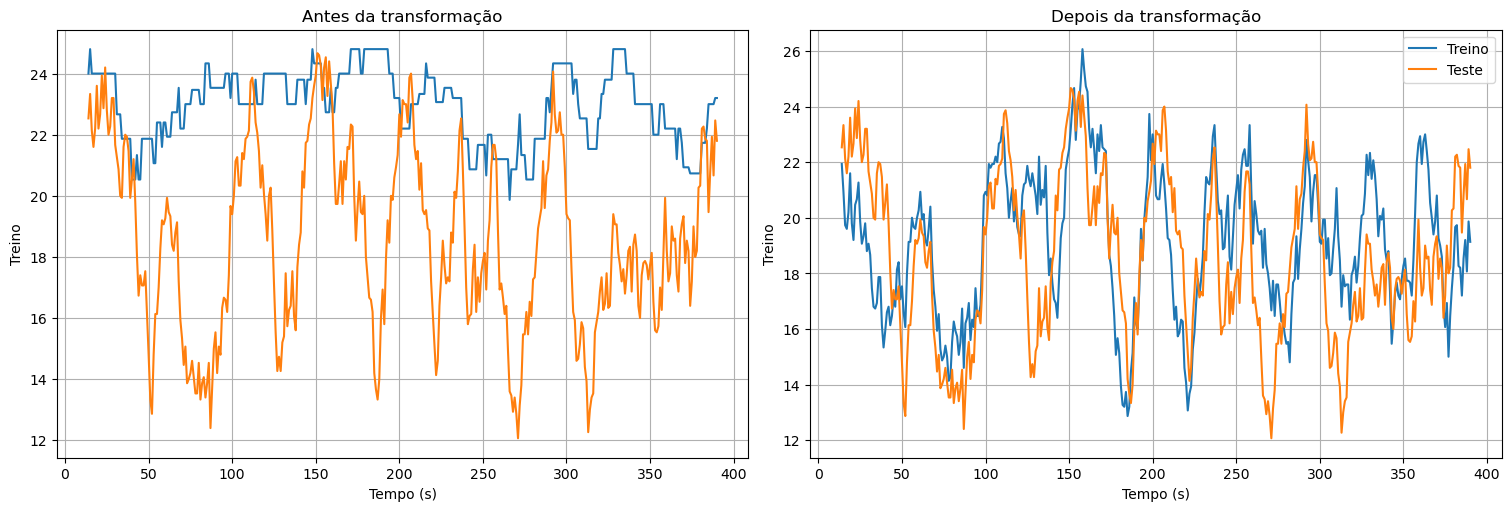

In [353]:
import matplotlib.pyplot as plt

y1 = y_hat  # depois da transformação
y2 = y_test  

z1 = y_hat_ #antes da transformação
z2 = y_test

#suavizar os dados do gráfico
window_size = 15
y1_smoothed = pd.Series(y1).rolling(window=window_size).mean()
y2_smoothed = pd.Series(y2).rolling(window=window_size).mean()
z1_smoothed = pd.Series(z1).rolling(window=window_size).mean()
z2_smoothed = pd.Series(z2).rolling(window=window_size).mean()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), layout='constrained')

# Conjunto de validação do classificador
axs[0].set_title('Antes da transformação')
axs[0].plot(z1_smoothed, label='Treino')
axs[0].plot(z2_smoothed, label='Teste')
axs[0].set_xlabel('Tempo (s)')
axs[0].set_ylabel('Treino')
axs[0].grid(True)

# Conjunto de validação do meta-classificador
axs[1].set_title('Depois da transformação')
axs[1].plot(y1_smoothed, label='Treino')
axs[1].plot(y2_smoothed, label='Teste')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('Treino')
axs[1].grid(True)

plt.legend()
plt.show()



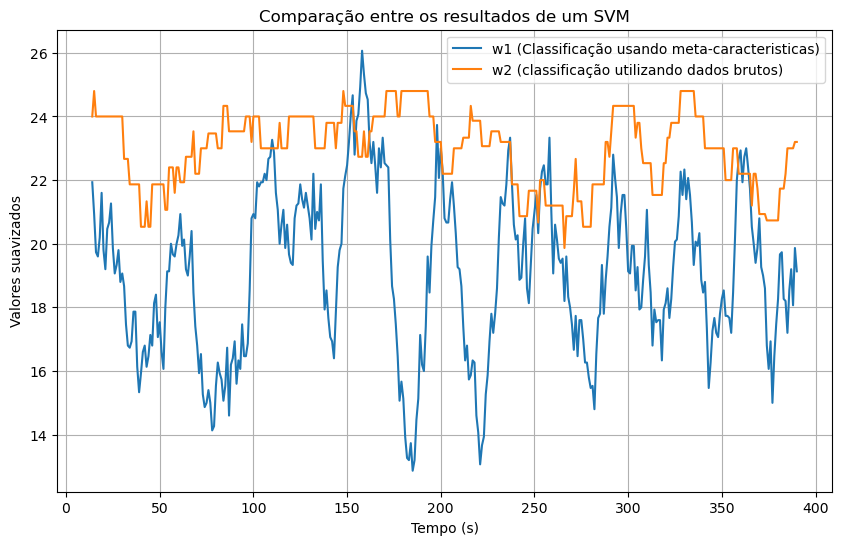

In [354]:
w1 = y_hat  # meta-classificador
w2 = y_hat_ #classificação

# Suavizar os dados do gráfico
window_size = 15
w1_smoothed = pd.Series(w1).rolling(window=window_size).mean()
w2_smoothed = pd.Series(w2).rolling(window=window_size).mean()

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.plot(w1_smoothed, label='w1 (Classificação usando meta-caracteristicas)')
plt.plot(w2_smoothed, label='w2 (classificação utilizando dados brutos)')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores suavizados')
plt.title('Comparação entre os resultados de um SVM')
plt.legend()
plt.grid(True)
plt.show()


### Treino em loop de todas as opções de classificadores disponiveis no Select Model.

In [ ]:
algos = ['1nn', '3nn', 'svm', 'nb', 'gbc', 'ee', 'shape', 'rf', 'rd']
for algo in algos:
    
    print(f'Meta-classificador com modelo extrator {algo.upper()}')
    
    # Training
    try:
        trained_base_models, meta_classifier = train_with_meta_classifier(X_train, y_train, base_option='svm', meta_option=algo)
        # Testing
        predictions_test_meta = predict_with_meta_classifier(X_test, trained_base_models, meta_classifier)
    
        test_accuracy_meta = np.mean(predictions_test_meta == y_test)
        print(f'Acurácia do teste usando o meta-classificador com modelo extrator {algo}: {test_accuracy_meta}')
    except Exception as e:
        print(f"Ocorreu um erro no teste com o {algo}: {e}")
    print("-------------------------------")